In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.colors import LogNorm

from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

filename = fetch_data("mwa_full_EE")

mwa_beam = UVBeam.from_file(filename, pixels_per_deg=1, beam_type="efield")


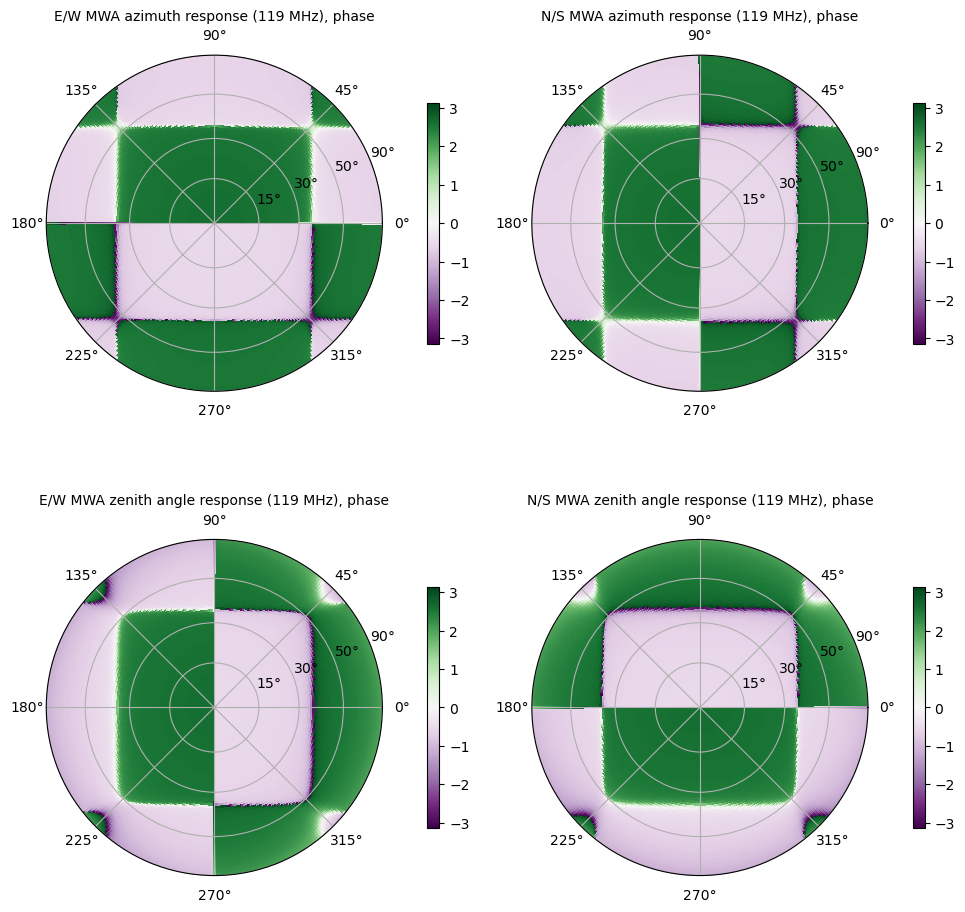

In [28]:
mwa_beam.plot(complex_type="phase")

In [ ]:
mwa_beam.efield_to_power(calc_cross_pols=False)
mwa_beam.peak_normalize()


In [2]:
mwa_beam.plot(freq_ind=-1, norm_kwargs={"vmin":1e-4, "vmax": 1}, savefile="mwa_power_beam.pdf")

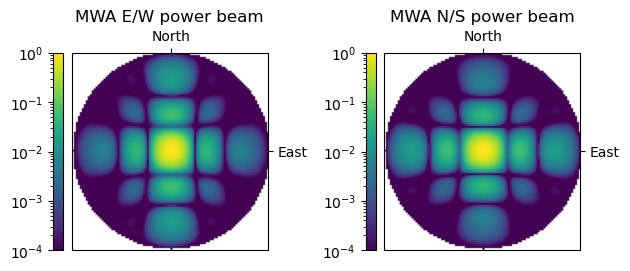

In [3]:

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

# Wrap the azimuth array to [0, 2pi] to match the extent of the UVBeam azimuth
where_neg_az = np.nonzero(az_array < 0)
az_array[where_neg_az] = az_array[where_neg_az] + np.pi * 2.
az_array = az_array.flatten()
za_array = za_array.flatten()

# find the values above the horizon so we don't try to interpolate the MWA beam
# beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
mwa_beam_vals = np.full((1, 2, 1, n_vals * n_vals), np.inf, dtype=float)

# The MWA beam we have in our test data is small, it only has 3 frequencies,
# so we will just get the value at one of those frequencies rather than
# trying to interpolate to a new frequency.
freqs = np.array([mwa_beam.freq_array[-1]])

mwa_beam_vals[:, :, :, above_hor], _ = mwa_beam.interp(
      az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)
mwa_beam_vals = mwa_beam_vals.reshape(2, n_vals, n_vals)

fig, ax = plt.subplots(1, 2)
bp_mwa0 = ax[0].imshow(
    mwa_beam_vals[0].real,
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0].set_title(f"MWA E/W power beam")
_ = fig.colorbar(bp_mwa0, ax=ax[0], fraction=0.046, pad=0.04, location="left")

bp_mwa1 = ax[1].imshow(
    mwa_beam_vals[1].real,
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1].set_title(f"MWA N/S power beam")
_ = fig.colorbar(bp_mwa1, ax=ax[1], fraction=0.046, pad=0.04, location="left")

for ind in range(2):
    _ = ax[ind].set_xticks([0], labels=["North"])
    _ = ax[ind].set_yticks([0], labels=["East"])
    _ = ax[ind].yaxis.set_label_position("right")
    _ = ax[ind].yaxis.tick_right()
    _ = ax[ind].xaxis.set_label_position("top")
    _ = ax[ind].xaxis.tick_top()

fig.tight_layout()
plt.savefig("mwa_uv_beam_interp.pdf", bbox_inches="tight")


In [4]:
print(mwa_beam_vals.min(), mwa_beam_vals.max())
mwa_beam_vals[~np.isfinite(mwa_beam_vals)] = 0
print(mwa_beam_vals.min(), mwa_beam_vals.max())

8.45832346234512e-09 inf
0.0 0.9999999999999999


In [5]:
mwa_beam_vals.shape

(2, 100, 100)

In [6]:
uv_size = 400 # pad the image with zeros to get a hyperresolved uv plane
uv_beam_vals = scipy.fft.fftshift(scipy.fft.fft2(mwa_beam_vals, s=(uv_size,uv_size)), axes=(1,2))
uv_axis = scipy.fft.fftfreq(uv_size, d=(np.diff(axis_arr)[0]))
delta_uv = np.diff(uv_axis)[0]

In [7]:
print(uv_beam_vals.min(), uv_beam_vals.max())
uv_cmap = "plasma"

(-134.38126845823066-1.6054860802005508e-05j) (143.04284127145598-0j)


invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


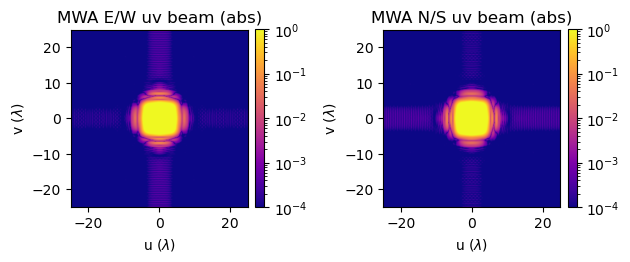

In [8]:
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    abs(uv_beam_vals[0]),
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (abs)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    abs(uv_beam_vals[1]),
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (abs)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()

invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


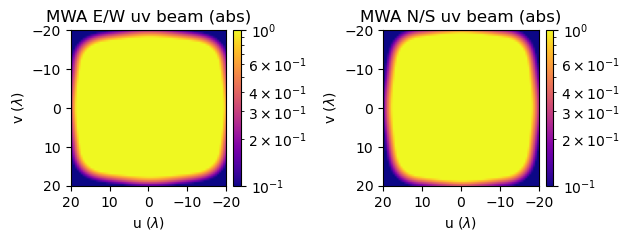

In [9]:
zoom_size = uv_size/5
zoom_min = int(uv_size/2 - zoom_size/2)
zoom_max = int(uv_size/2 + zoom_size/2)
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    abs(uv_beam_vals[0, zoom_min:zoom_max, zoom_min:zoom_max]),
    norm=LogNorm(vmin = 1e-1, vmax =1),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (abs)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    abs(uv_beam_vals[1, zoom_min:zoom_max, zoom_min:zoom_max]),
    norm=LogNorm(vmin = 1e-1, vmax =1),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (abs)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()
# plt.savefig("mwa_uv_beam.pdf", bbox_inches="tight")

In [10]:
# empirical mask
mask_size = uv_size/5
mask_min = int(uv_size/2 - mask_size/2)
mask_max = int(uv_size/2 + mask_size/2)
mask = np.zeros(uv_beam_vals.shape, dtype=float)
for pi in range(2):
    mask[pi, mask_min:mask_max, mask_min:mask_max] = 1.0
print(mask.min(), mask.max())
masked_uv_beam_vals = uv_beam_vals * mask
print(masked_uv_beam_vals.min(), masked_uv_beam_vals.max())

0.0 1.0
(-134.38126845823066-1.6054860802005508e-05j) (143.04284127145598+0j)


In [11]:
norm_uv_beam = np.sum(np.abs(uv_beam_vals), axis=(1,2)) * (delta_uv**2)
norm_masked_uv_beam = np.sum(np.abs(masked_uv_beam_vals), axis=(1,2)) * (delta_uv**2)
print(norm_uv_beam, norm_masked_uv_beam)

[2496.77061764 2500.29281009] [2494.21214136 2497.72943235]


In [12]:

for pi in range(2):
    masked_uv_beam_vals[pi] /= norm_masked_uv_beam[pi]
print(masked_uv_beam_vals.min(), masked_uv_beam_vals.max())

(-0.05380137124441966-6.427782206525782e-09j) (0.05726914990011641+0j)


invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


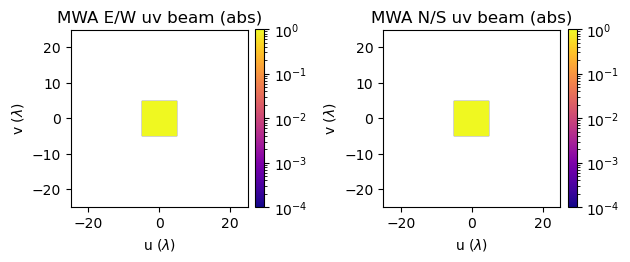

In [13]:
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    mask[0],
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (abs)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    mask[1],
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (abs)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()

invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


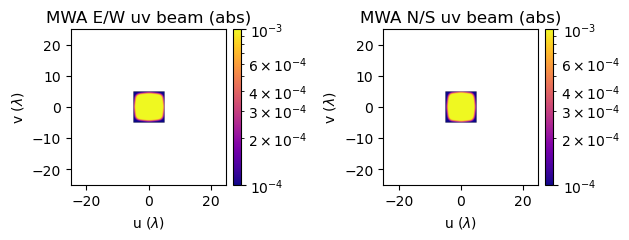

In [14]:
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    np.abs(masked_uv_beam_vals[0]),
    norm=LogNorm(vmin = 1e-4, vmax =1e-3),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (abs)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    np.abs(masked_uv_beam_vals[1]),
    norm=LogNorm(vmin = 1e-4, vmax =1e-3),
    extent=[np.min(uv_axis), np.max(uv_axis), np.min(uv_axis), np.max(uv_axis)],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (abs)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()

invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


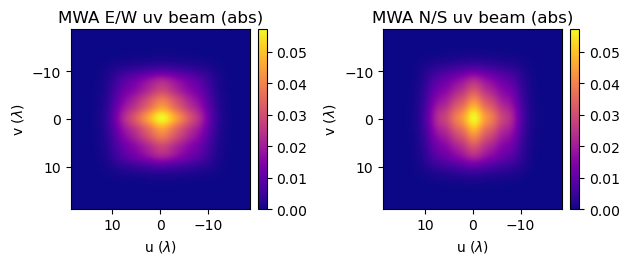

In [19]:
zoom_size = uv_size/4
zoom_min = int(uv_size/2 - zoom_size/2)
zoom_max = int(uv_size/2 + zoom_size/2)
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    abs(masked_uv_beam_vals[0, zoom_min:zoom_max, zoom_min:zoom_max]),
    # norm=LogNorm(vmin = 1e-3, vmax =1),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (abs)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    abs(masked_uv_beam_vals[1, zoom_min:zoom_max, zoom_min:zoom_max]),
    # norm=LogNorm(vmin = 1e-3, vmax =1),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (abs)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.savefig("mwa_uv_beam_abs.pdf", bbox_inches="tight")

invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


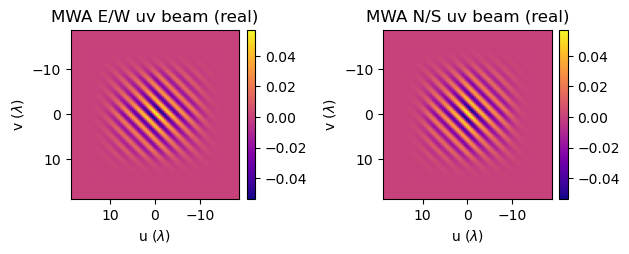

In [21]:
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    np.real(masked_uv_beam_vals[0, zoom_min:zoom_max, zoom_min:zoom_max]),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (real)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    np.real(masked_uv_beam_vals[1, zoom_min:zoom_max, zoom_min:zoom_max]),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (real)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.savefig("mwa_uv_beam_real.pdf", bbox_inches="tight")

invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'
invalid escape sequence '\l'


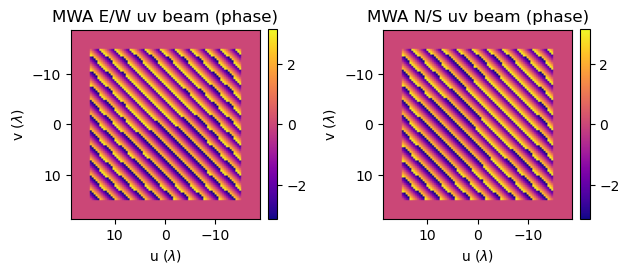

In [22]:
fig, ax = plt.subplots(1, 2)
bp_uv0 = ax[0].imshow(
    np.angle(masked_uv_beam_vals[0, zoom_min:zoom_max, zoom_min:zoom_max]),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[0].set_title(f"MWA E/W uv beam (phase)")
_ = ax[0].set_xlabel("u ($\lambda$)")
_ = ax[0].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv0, ax=ax[0], fraction=0.046, pad=0.04)

bp_uv1 = ax[1].imshow(
    np.angle(masked_uv_beam_vals[1, zoom_min:zoom_max, zoom_min:zoom_max]),
    extent=[uv_axis[zoom_min], uv_axis[zoom_max], uv_axis[zoom_min], uv_axis[zoom_max]],
    origin="lower",
    cmap=uv_cmap,
)
_ = ax[1].set_title(f"MWA N/S uv beam (phase)")
_ = ax[1].set_xlabel("u ($\lambda$)")
_ = ax[1].set_ylabel("v ($\lambda$)")
_ = fig.colorbar(bp_uv1, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.savefig("mwa_uv_beam_phase.pdf", bbox_inches="tight")